## Decision Trees Classification

### Loading a preparing data

Load a small version of the Iris flower data set with only 2 features:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']
cols=['petal length', 'petal width', 'target']
iris=iris[cols]

In [ ]:
iris.head()

,petal length,petal width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal length  150 non-null    float64
 1   petal width   150 non-null    float64
 2   target        150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


We see that there are no missing values in the data. 

### The basic idea of Decision Trees

*Decision Trees* are another popular and very powerful machine learning algorithms which can be used for both classification and regression. One great feature of these family of algorithms is that they are extremely intuitive and their decision making process can be easily visualized in a form of, well, a decision tree. For example, let's build a simple decision tree classifier for the Iris flower data set. 

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#
from sklearn.tree import DecisionTreeClassifier

X=iris.iloc[:, :-1].values
y=iris.iloc[:, -1]

tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
from sklearn.tree import export_graphviz

export_graphviz(tree,
                out_file='iris.dot',
                feature_names=['petal length', 'petal width'],
                class_names=['setosa', 'versicolor', 'virginica'],
                rounded=True,
                filled=True,
                )

In [ ]:
!dot -Tpng iris.dot -o iris.png

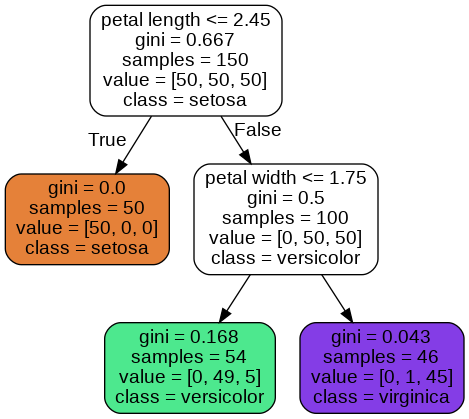

In [ ]:
from IPython.display import Image
Image("iris.png")

So, what is going on here? The graph above shows a typical decision tree which is nothing but a sequence of checks we need to perform to assign a class to a given instance. At the very top of the tree, we see the so-called *root node*, which has a depth of 0 and represent a place where we start. We pick a flower (or instance) from the data set and check whether or not its petal length is smaller or equal to 2.45 cm. If the answer to this question is "yes" then we move down to the *child node* of the root. This child node is shown in brown and has a depth of 1. This node does not have any children. Such a node is called a *leaf node*. If we arrived at a leaf node it means that we are done and ready to assign a class to the instance/flower: in this example the class is iris setosa.

If the answer to the root node's question is "no" (meaning that the petal length of the flower is larger than 2.45 cm) then we must go to the depth 1 node shown in white (to the right of the brown node). In this node, we check the value of the `petal width` feature in a similar manner. If it is smaller or equal to 1.75 cm then we arrive at the green node in the last row of our decision tree which has a depth of 2: this is another leaf node and, if we get there, we must classify the flower as iris versicolor. On the other hand, if the petal width of the flower is larger than 1.75 cm then we must classify it as iris virginica (see the purple node of depth 2). 

As you see, the work of this desicion tree is very easy to understand: it is crystal clear how the decision process works. This transparency is one of the great features of this algorighm. Another advantage of this algorithm is that decision trees typically require very little data preparation: it is not necessary to scale or center the data.

Note that each non-leaf node shows the condition used to split the data; for example, for the root node this condition is `'petal length <= 2.45`. In addition, all node (including the leaf nodes) show a number of attributes: gini, samples, value, class. The sample attribute shows the total number of training instance that meet all coditions preceeding the node. For example, the green node has 54 training instances in it. The value attribute shows the class information for the training instances of this node. Looking at the same green node, we see that 0 of its instances belong to the zeroth class (setosa), 49 to class 1 (versicolor), and 5 to class 2 (virginica). You can easily check that $0+49+5=54$. The gini attribute shows the so-called *Gini score* which is a measure of imputity of the node and defined as

$$
G = 1 - \sum\limits_{k=0}^{K-1}p^2_k\;,
$$

where $K$ is the number of classes (3 in our example) and $p_k$ is the fraction of instances of the $k^{\text{th}}$ class in the node. For example, for the green node, instance we have

$$
G = 1-\left(\frac{0}{54}\right)^2-\left(\frac{49}{54}\right)^2-\left(\frac{5}{54}\right)^2\approx  0.168\;.
$$

In [ ]:
1-(49/54)**2-(5/54)**2

0.1680384087791495

Note that the Gini score of the brown node is zero because the instances of this node all belong to the same class 0. We call such a node *pure*. The larger the Gini score the less pure the node is. This is why we often call it the measure of impurity of the node.

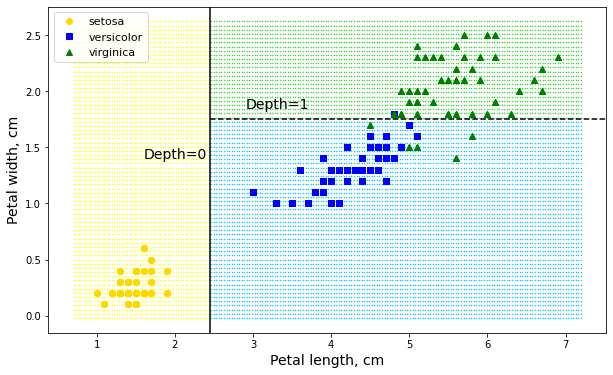

In [ ]:
import matplotlib.pyplot as plt

n_grid_x=200
ms=0.5
plt.figure(figsize=(10, 6))

mask_0=iris['target']==0
mask_1=iris['target']==1
mask_2=iris['target']==2

plt.plot(iris.loc[mask_0, 'petal length'], iris.loc[mask_0, 'petal width'], 'o', color='gold')
plt.plot(iris.loc[mask_1, 'petal length'], iris.loc[mask_1, 'petal width'], 's', color='blue')
plt.plot(iris.loc[mask_2, 'petal length'], iris.loc[mask_2, 'petal width'], '^', color='green')

x_min = plt.gca().get_xlim()[0]
x_max = plt.gca().get_xlim()[1]
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]

x1 = np.linspace(x_min, x_max, n_grid_x)
# The number of grid point along the vertical axis
# is adjusted to have the same horizontal and vertical
# spacing between the grid points 
n_grid_y=int(n_grid_x*y_max/x_max)
x2 = np.linspace(y_min, y_max, n_grid_y)

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.reshape(n_grid_x*n_grid_y, -1)
x2 = x2.reshape(n_grid_x*n_grid_y, -1)

x_grid=np.hstack((x1, x2))

y_grid = tree.predict(x_grid)

plt.plot(x1[y_grid==0], x2[y_grid==0], 'o', color='yellow', ms=ms)
plt.plot(x1[y_grid==1], x2[y_grid==1], 'o', color='deepskyblue', ms=ms)
plt.plot(x1[y_grid==2], x2[y_grid==2], 'o', color='limegreen', ms=ms)

thr=tree.tree_.threshold
plt.axvline(thr[0], color='black')
plt.text(1.6, 1.4, 'Depth=0', fontsize=14)

x_min = plt.gca().get_xlim()[0]
x_max = plt.gca().get_xlim()[1]
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]

plt.axhline(thr[2], (thr[0]-x_min)/(x_max-x_min), 1, color='black', ls='--')
plt.text(2.9, 1.85, 'Depth=1', fontsize=14)

plt.plot(iris.loc[mask_0, 'petal length'], iris.loc[mask_0, 'petal width'], 'o', color='gold', label='setosa')
plt.plot(iris.loc[mask_1, 'petal length'], iris.loc[mask_1, 'petal width'], 's', color='blue', label='versicolor')
plt.plot(iris.loc[mask_2, 'petal length'], iris.loc[mask_2, 'petal width'], '^', color='green', label='virginica')

plt.xlabel("Petal length, cm", fontsize=14)
plt.ylabel("Petal width, cm", fontsize=14)
plt.legend(#loc='lower right', 
           fontsize=11)
plt.show()

### Training Decision Trees

In order for this algorithm to work, we need to train it. In the case of Desicion Trees, "training" means that for every node of the tree the algorithm must learn the best feature to split upon and the threshold value (e.g. `petal length` and 2.45, respectively, for the root node). The Scikit-Learn library using the Classification and Regression Tree (CART) algorithm to train (or "grow") Decision Trees. At each step, the algorithm searches for the best binary split that creates the purest subsets of the data using the Gini score as a measure of impurity; the subsets are weighted by their size when computing the total impurity. In other words, the algorithm tries to minimize the following *cost function*:

$$
J = \frac{m_\text{left}}{m}G_\text{left} + \frac{m_\text{right}}{m}G_\text{right}\;, 
$$

where "left" and "right" refer to the two subsets created by splitting the data, $G_\text{left/right}$ are the Gini scores for the subsets, $m_\text{left/right}$ are the numbers of instances in the subsets, and $m$ is the total number of instances.

You can read more about desicion trees and CART algorithm at [this Wikipedia page](https://en.wikipedia.org/wiki/Decision_tree_learning).

### Regularization of hyperparameters

Decision Trees are very flexible. Without any restrictions, the tree structure can fit any data almost perfectly. In most cases, it means overfitting. This is why Decision Trees have quite a few hyperparameters that can be tuned to avoid overfitting. Here we mention some of them:

* `'max_depth'`: controls the maximum depth of the tree (default `None`);
* `'min_sample_split'`: the minimum number of samples a node must have before it can be split;
* `'min_sample_leaf'`: the minimum number of samples a leaf node must have;
* `'max_leaf_nodes'`: the maximum number of leaf nodes;
* `'max_features'`: the maximum number of features that are evaluated for splitting a each node.

Increasing `'min_'` and decreasing `'max_'` hyperparameters will help to regularize the model.

## Decision Trees Regression

Decision Trees can be used for regression. Let's create some noisy quadratic data and perform Decision Trees regression with `'max_depth'=2`.

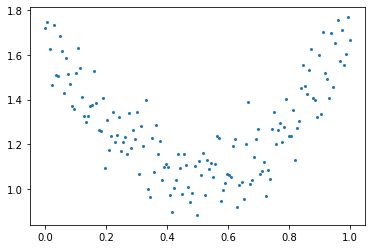

In [ ]:
n=150
sc=0.1
a=2.5
b=-2.5
c=1.7

X=np.linspace(0, 1, n)
y=a*X**2+b*X+c+np.random.normal(loc=0, scale=sc, size=n)

plt.plot(X, y, 'o', ms=2)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg=DecisionTreeRegressor(max_depth=2)
reg.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
export_graphviz(reg,
                out_file='reg.dot',
                feature_names=['x'],
                rounded=True,
                filled=True,
                )

In [ ]:
!dot -Tpng reg.dot -o reg.png

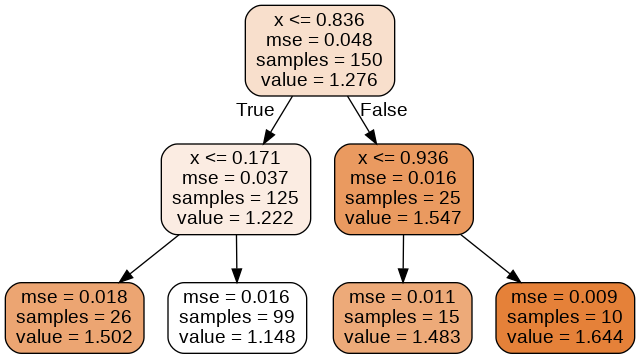

In [ ]:
Image("reg.png")

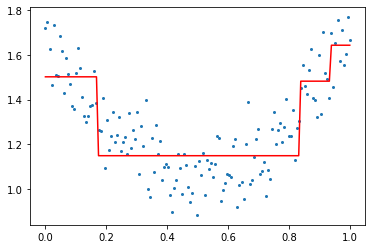

In [ ]:
plt.plot(X, y, 'o', ms=2)

y_pred=reg.predict(X.reshape(-1, 1))
plt.plot(X, y_pred, '-', color='red')

plt.show()

Adjusting the Decision Trees hyperparameters alows to make an even better fit.

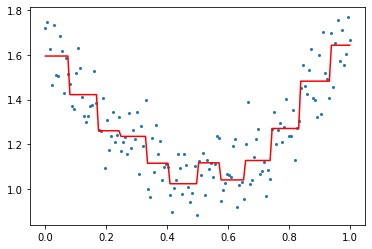

In [ ]:
plt.plot(X, y, 'o', ms=2)

reg2=DecisionTreeRegressor(min_samples_leaf=10)
reg2.fit(X.reshape(-1, 1), y)
y_pred=reg2.predict(X.reshape(-1, 1))
plt.plot(X, y_pred, '-', color='red')

plt.show()